In [1]:
library(googlesheets4)
library(ggplot2)
library(ggbeeswarm)
library(glue)

Warning message:
"package 'ggbeeswarm' was built under R version 4.0.5"


In [2]:
sheets_auth(path = "I:/spreadsheet-service-302407.json")

all_data <- read_sheet(
    ss="12yARRjZTZlD-tqx-bz7JYzwZ5XVVOf59o8kTbR0s4xw",
    range="shCtrl_003_shOPA1_003(論文用データ)"
)

all_data_ <- all_data[!is.na(all_data$`tubular_S/cristae_S`), ]

Warning message:
"`sheets_auth()` is deprecated as of googlesheets4 0.2.0.
Please use `gs4_auth()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."
Reading from "quantification_result"

Range "'shCtrl_003_shOPA1_003(論文用データ)'"

New names:
* `` -> ...5
* `` -> ...23
* `` -> ...28
* `` -> ...37
* `` -> ...40
* ...



# mito V

In [3]:
mv_data <- data.frame(
    Gene = c("shCtrl", "shCtrl", "shCtrl", "shCtrl", "shCtrl","", "shOPA1", "shOPA1", "shOPA1", "shOPA1", "shOPA1"),
    cell_No = c(1, 2, 3, 4, 5, "",1, 2, 3, 4, 5),
    Type = c("shCtrl_1", "shCtrl_2", "shCtrl_3", "shCtrl_4", "shCtrl_5","shD", "shOPA1_1", "shOPA1_2", "shOPA1_3", "shOPA1_4", "shOPA1_5"),
    mito_V_um = c(
        mean(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 1, ]$mito_V_nm)　/ 1000000000,
        mean(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 2, ]$mito_V_nm) / 1000000000,
        mean(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 3, ]$mito_V_nm) / 1000000000,
        mean(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 4, ]$mito_V_nm) / 1000000000,
        mean(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 5, ]$mito_V_nm) / 1000000000,
        NA,
        mean(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 1, ]$mito_V_nm) / 1000000000,
        mean(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 2, ]$mito_V_nm) / 1000000000,
        mean(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 3, ]$mito_V_nm) / 1000000000,
        mean(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 4, ]$mito_V_nm) / 1000000000,
        mean(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 5, ]$mito_V_nm) / 1000000000
    ),
    sd = c(
        sd(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 1, ]$mito_V_nm)　/ 1000000000,
        sd(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 2, ]$mito_V_nm) / 1000000000,
        sd(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 3, ]$mito_V_nm) / 1000000000,
        sd(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 4, ]$mito_V_nm) / 1000000000,
        sd(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 5, ]$mito_V_nm) / 1000000000,
        NA,
        sd(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 1, ]$mito_V_nm) / 1000000000,
        sd(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 2, ]$mito_V_nm) / 1000000000,
        sd(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 3, ]$mito_V_nm) / 1000000000,
        sd(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 4, ]$mito_V_nm) / 1000000000,
        sd(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 5, ]$mito_V_nm) / 1000000000
    )
)

Warning message:
"Removed 1 rows containing missing values (position_stack)."
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y,

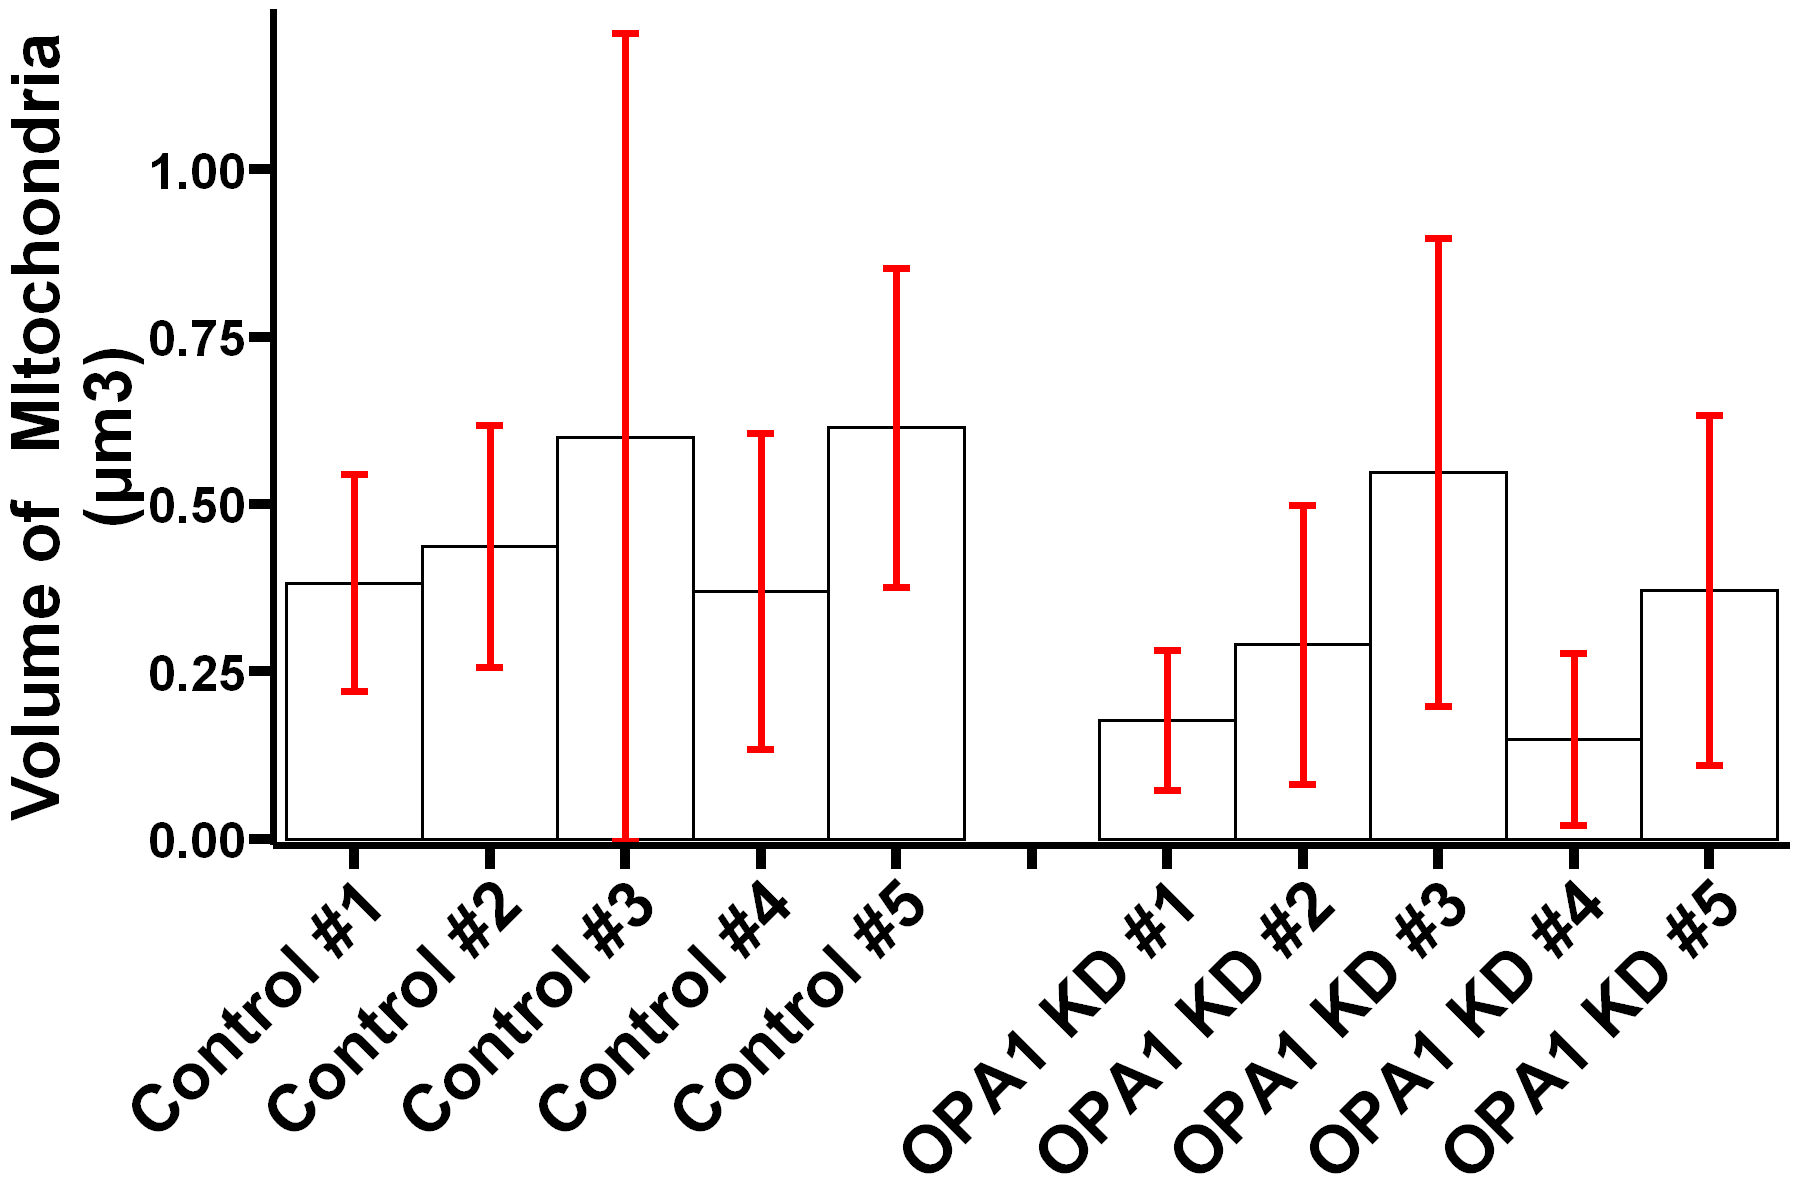

In [4]:
options(repr.plot.width=15, repr.plot.height=10)

graph <- ggplot(NULL)

graph <- graph + theme(
    axis.line = element_line(size = 2, colour="black"),
    axis.title.x = element_blank(),
    axis.title.y = element_text(size = 40, face = "bold", family = "Helvetica", color="black"),
    axis.text.x = element_text(size = 40, face = "bold", family = "Helvetica", color="black", angle = 45, hjust=1),
    axis.text.y = element_text(size = 30, face = "bold", family = "Helvetica", color="black"),
    axis.ticks = element_line(size = 3, color="black"),
    axis.ticks.length = unit(5, "mm"),
    panel.background = element_blank(), 
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
) + scale_y_continuous(
    expand = c(0,0), 
    limits=c(-0.01, 1.24)
)

graph <- graph + labs(
    y = "Volume of　MItochondria\n(µm3) "
) + geom_bar(
    stat="identity",
    data = mv_data,
    aes(x=Type, y=mito_V_um),
    width=1,
    fill="white", 
    colour = "black",
    size = 1
) 

graph <- graph+ geom_errorbar(
    data = mv_data,
    size = 2,
    width = 0.2,
    color="red",
    aes(x = Type, ymin = mito_V_um - sd, ymax = mito_V_um + sd)
) + scale_x_discrete(
    labels = c("Control #1", "Control #2", "Control #3", "Control #4", "Control #5", "", "OPA1 KD #1", "OPA1 KD #2", "OPA1 KD #3", "OPA1 KD #4", "OPA1 KD #5"),
)


graph

In [5]:
dir.create("Z:/paper_data/2021_cristae/for_revision_#2/figS7")
ggsave(file = "Z:/paper_data/2021_cristae/for_revision_#2/figS7/002_mv.svg", plot = graph, dpi = 100, width = 15, height = 10)


Warning message in dir.create("Z:/paper_data/2021_cristae/for_revision_#2/figS7"):
" 'Z:\paper_data\2021_cristae\for_revision_#2\figS7' はすでに存在します "
Warning message:
"Removed 1 rows containing missing values (position_stack)."


# mito S

In [6]:
ms_data <- data.frame(
    Gene = c("shCtrl", "shCtrl", "shCtrl", "shCtrl", "shCtrl", "", "shOPA1", "shOPA1", "shOPA1", "shOPA1", "shOPA1"),
    cell_No = c(1, 2, 3, 4, 5, "", 1, 2, 3, 4, 5),
    Type = c("shCtrl_1", "shCtrl_2", "shCtrl_3", "shCtrl_4", "shCtrl_5", "shD", "shOPA1_1", "shOPA1_2", "shOPA1_3", "shOPA1_4", "shOPA1_5"),
    mito_S_um = c(
        mean(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 1, ]$mito_S_nm)　/ 1000000,
        mean(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 2, ]$mito_S_nm) / 1000000,
        mean(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 3, ]$mito_S_nm) / 1000000,
        mean(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 4, ]$mito_S_nm) / 1000000,
        mean(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 5, ]$mito_S_nm) / 1000000,
        NA,
        mean(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 1, ]$mito_S_nm) / 1000000,
        mean(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 2, ]$mito_S_nm) / 1000000,
        mean(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 3, ]$mito_S_nm) / 1000000,
        mean(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 4, ]$mito_S_nm) / 1000000,
        mean(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 5, ]$mito_S_nm) / 1000000
    ),
    sd = c(
        sd(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 1, ]$mito_S_nm)　/ 1000000,
        sd(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 2, ]$mito_S_nm) / 1000000,
        sd(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 3, ]$mito_S_nm) / 1000000,
        sd(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 4, ]$mito_S_nm) / 1000000,
        sd(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 5, ]$mito_S_nm) / 1000000,
        NA,
        sd(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 1, ]$mito_S_nm) / 1000000,
        sd(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 2, ]$mito_S_nm) / 1000000,
        sd(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 3, ]$mito_S_nm) / 1000000,
        sd(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 4, ]$mito_S_nm) / 1000000,
        sd(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 5, ]$mito_S_nm) / 1000000
    )
)

Warning message:
"Removed 1 rows containing missing values (position_stack)."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call.graphics(C_text, as.graphicsAnno

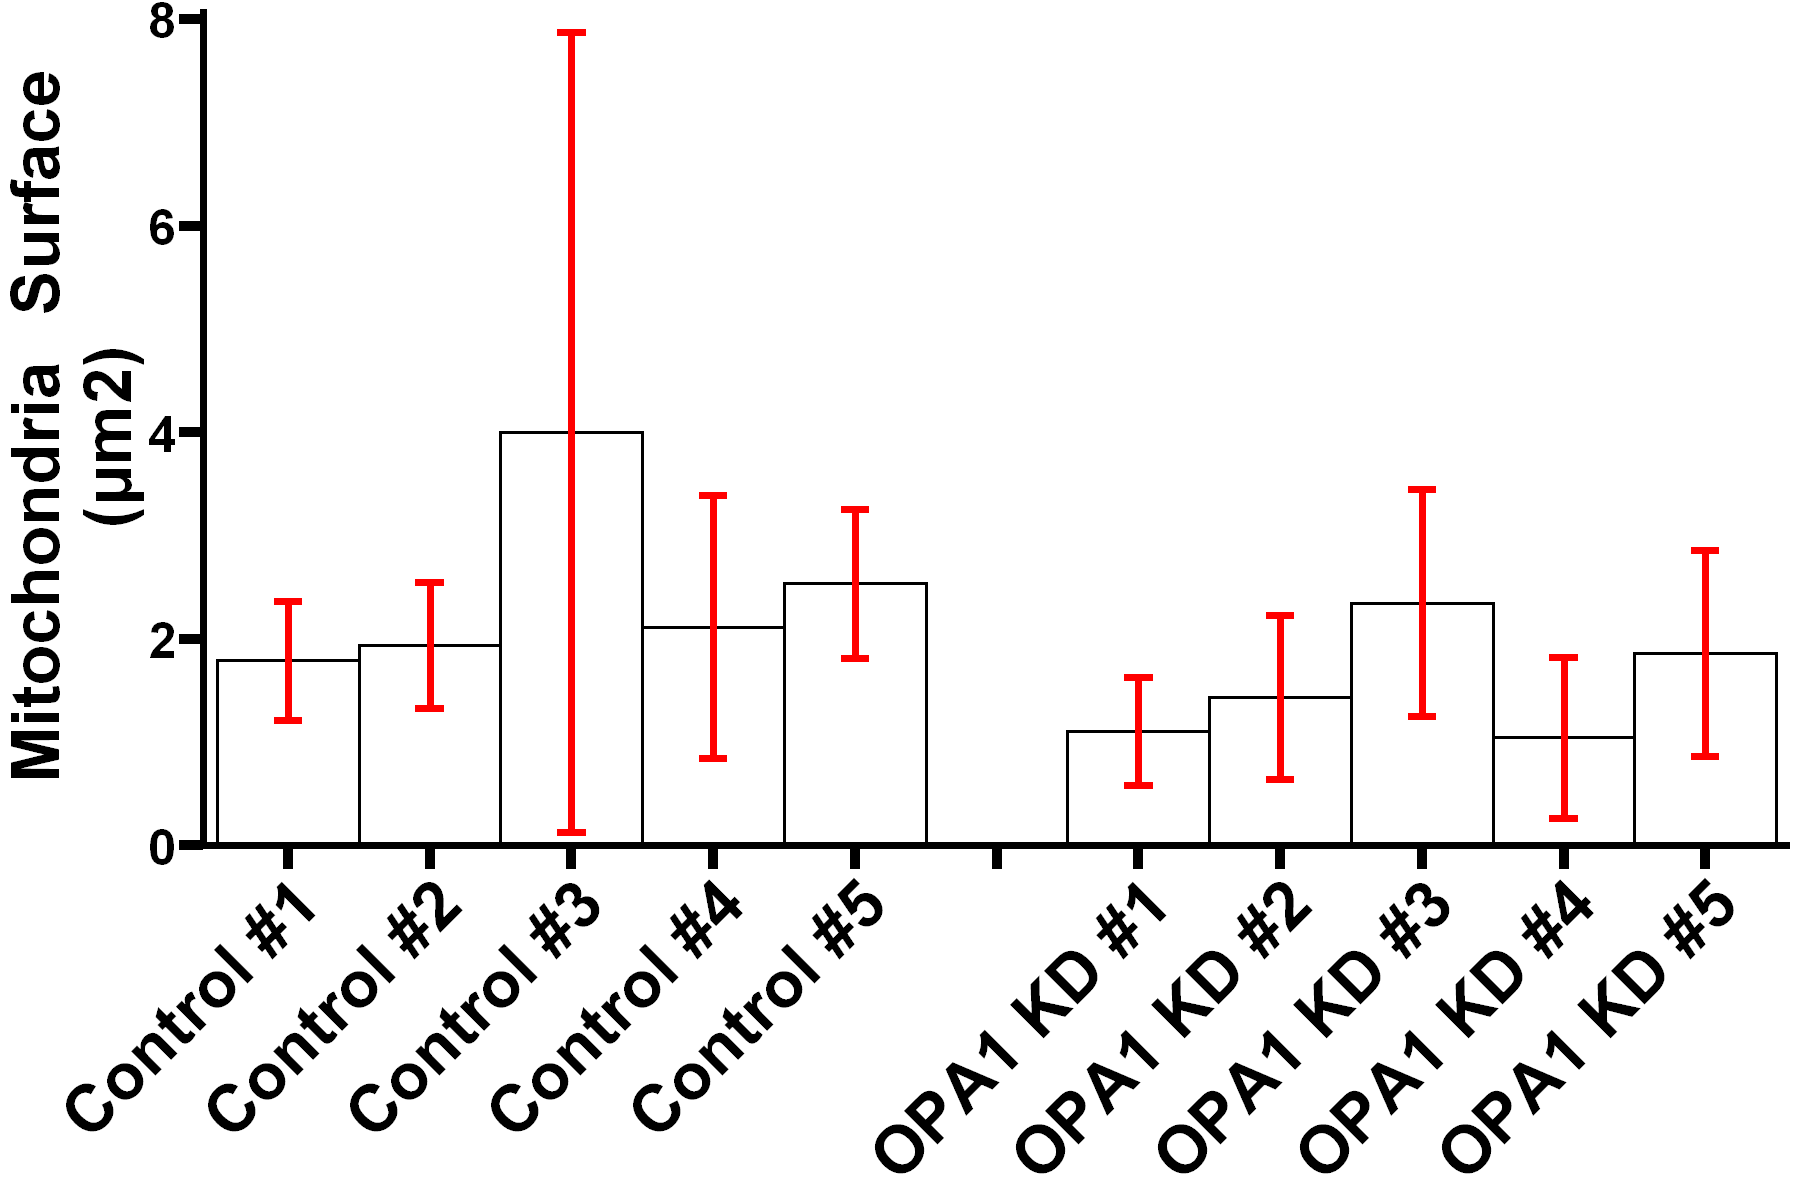

In [7]:
options(repr.plot.width=15, repr.plot.height=10)

graph <- ggplot(NULL)

graph <- graph + theme(
    axis.line = element_line(size = 2, colour="black"),
    axis.title.x = element_blank(),
    axis.title.y = element_text(size = 40, face = "bold", family = "Helvetica", color="black"),
    axis.text.x = element_text(size = 40, face = "bold", family = "Helvetica", color="black", angle = 45, hjust=1),
    axis.text.y = element_text(size = 30, face = "bold", family = "Helvetica", color="black"),
    axis.ticks = element_line(size = 3, color="black"),
    axis.ticks.length = unit(5, "mm"),
    panel.background = element_blank(), 
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
) + scale_y_continuous(
    expand = c(0,0), 
    limits=c(0.0, 8.1)
)

graph <- graph + labs(
    y = "Mitochondria　Surface\n(µm2) "
) + geom_bar(
    stat="identity",
    data = ms_data,
    aes(x=Type, y=mito_S_um),
    width=1,
    fill="white", 
    colour = "black",
    size = 1
) 

graph <- graph+ geom_errorbar(
    data = ms_data,
    size = 2,
    width = 0.2,
    color="red",
    aes(x = Type, ymin = mito_S_um - sd, ymax = mito_S_um + sd)
) + scale_x_discrete(
    labels = c("Control #1", "Control #2", "Control #3", "Control #4", "Control #5", "", "OPA1 KD #1", "OPA1 KD #2", "OPA1 KD #3", "OPA1 KD #4", "OPA1 KD #5"),
)


graph

In [8]:
ggsave(file = "Z:/paper_data/2021_cristae/for_revision_#2/figS7/002_ms.svg", plot = graph, dpi = 100, width = 15, height = 10)


Warning message:
"Removed 1 rows containing missing values (position_stack)."


# crista V

In [9]:
cv_data <- data.frame(
    Gene = c("shCtrl", "shCtrl", "shCtrl", "shCtrl", "shCtrl","shD", "shOPA1", "shOPA1", "shOPA1", "shOPA1", "shOPA1"),
    cell_No = c(1, 2, 3, 4, 5,"", 1, 2, 3, 4, 5),
    Type = c("shCtrl_1", "shCtrl_2", "shCtrl_3", "shCtrl_4", "shCtrl_5", "shD", "shOPA1_1", "shOPA1_2", "shOPA1_3", "shOPA1_4", "shOPA1_5"),
    cristae_V_um = c(
        mean(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 1, ]$cristae_V_nm)　/ 1000000000,
        mean(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 2, ]$cristae_V_nm) / 1000000000,
        mean(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 3, ]$cristae_V_nm) / 1000000000,
        mean(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 4, ]$cristae_V_nm) / 1000000000,
        mean(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 5, ]$cristae_V_nm) / 1000000000,
        NA,
        mean(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 1, ]$cristae_V_nm) / 1000000000,
        mean(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 2, ]$cristae_V_nm) / 1000000000,
        mean(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 3, ]$cristae_V_nm) / 1000000000,
        mean(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 4, ]$cristae_V_nm) / 1000000000,
        mean(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 5, ]$cristae_V_nm) / 1000000000
    ),
    sd = c(
        sd(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 1, ]$cristae_V_nm)　/ 1000000000,
        sd(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 2, ]$cristae_V_nm) / 1000000000,
        sd(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 3, ]$cristae_V_nm) / 1000000000,
        sd(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 4, ]$cristae_V_nm) / 1000000000,
        sd(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 5, ]$cristae_V_nm) / 1000000000,
        NA,
        sd(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 1, ]$cristae_V_nm) / 1000000000,
        sd(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 2, ]$cristae_V_nm) / 1000000000,
        sd(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 3, ]$cristae_V_nm) / 1000000000,
        sd(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 4, ]$cristae_V_nm) / 1000000000,
        sd(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 5, ]$cristae_V_nm) / 1000000000
    )
)

Warning message:
"Removed 1 rows containing missing values (position_stack)."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call.graphics(C_text, as.graphicsAnno

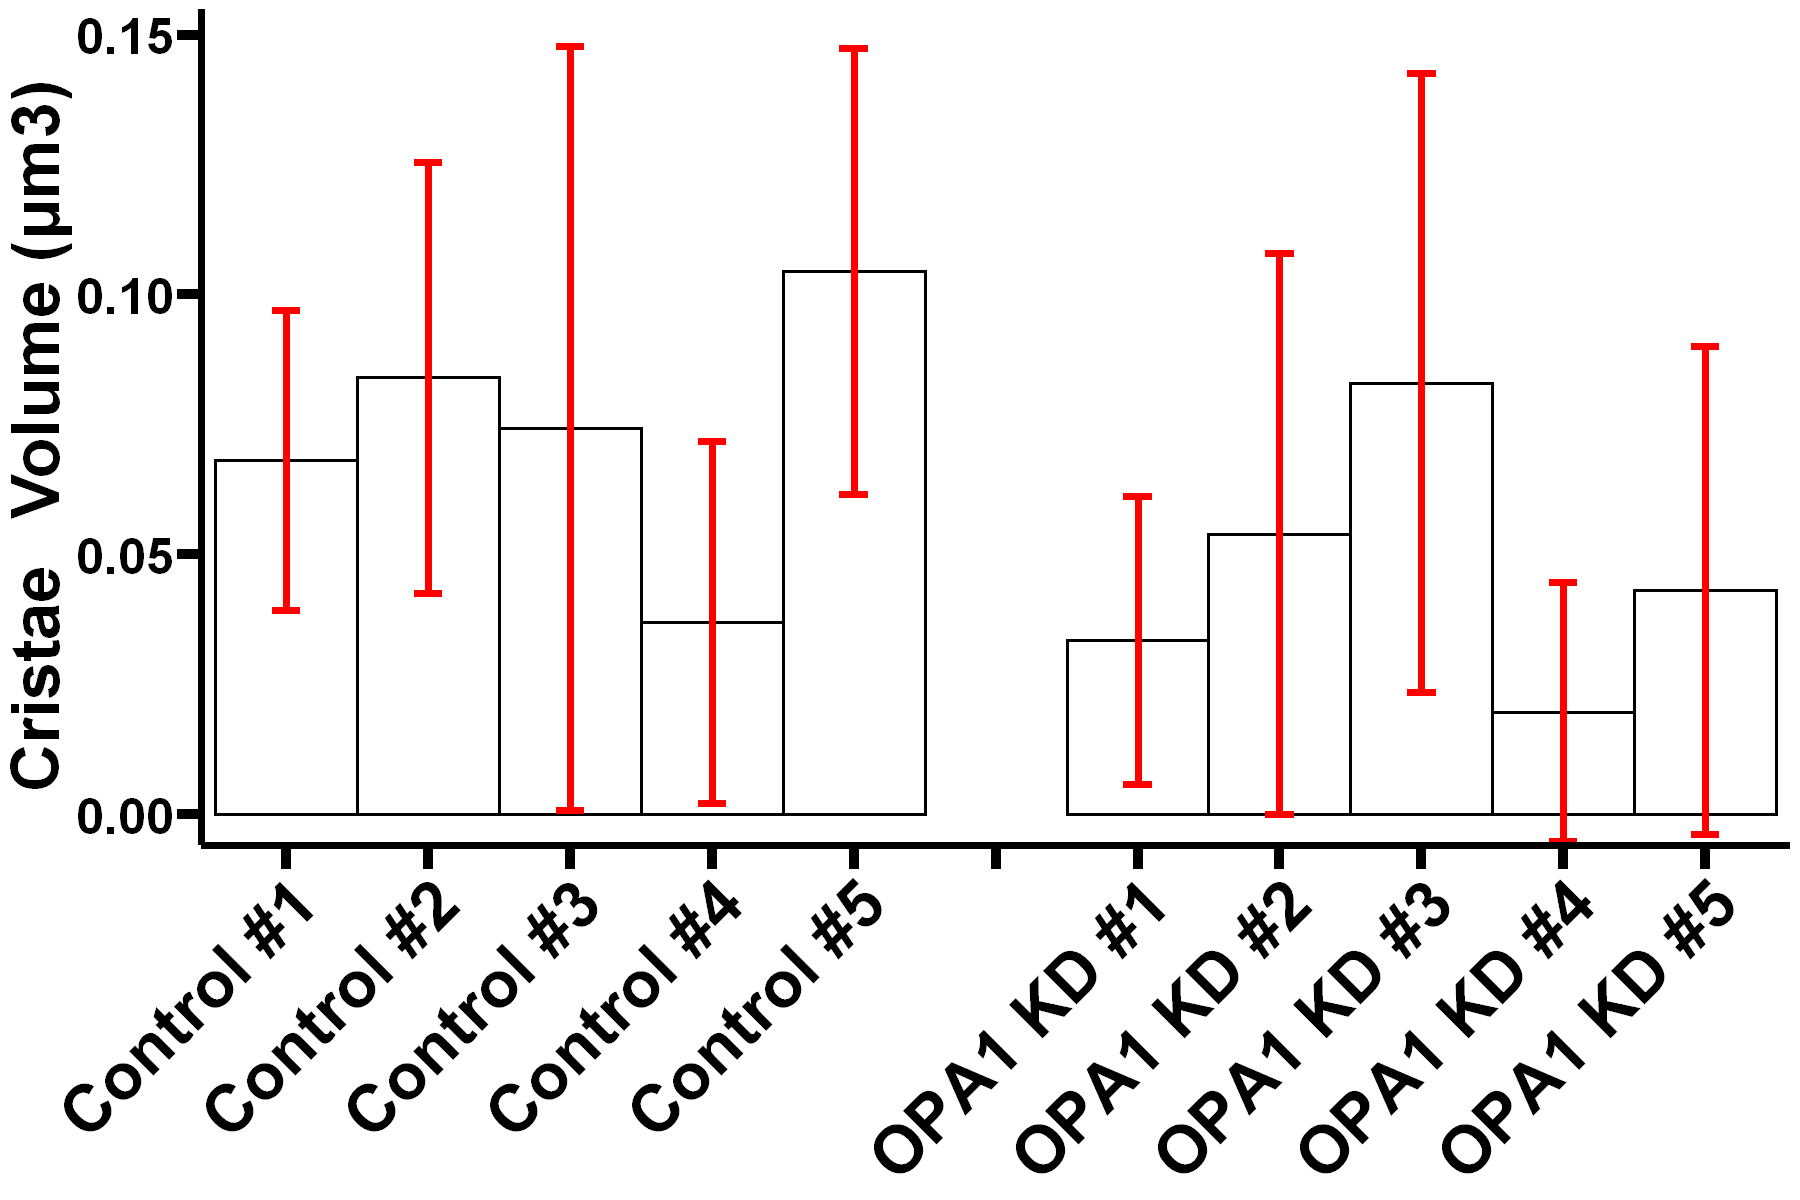

In [10]:
options(repr.plot.width=15, repr.plot.height=10)

graph <- ggplot(NULL)

graph <- graph + theme(
    axis.line = element_line(size = 2, colour="black"),
    axis.title.x = element_blank(),
    axis.title.y = element_text(size = 40, face = "bold", family = "Helvetica", color="black"),
    axis.text.x = element_text(size = 40, face = "bold", family = "Helvetica", color="black", angle = 45, hjust=1),
    axis.text.y = element_text(size = 30, face = "bold", family = "Helvetica", color="black"),
    axis.ticks = element_line(size = 3, color="black"),
    axis.ticks.length = unit(5, "mm"),
    panel.background = element_blank(), 
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
) + scale_y_continuous(
    expand = c(0,0), 
    limits=c(-0.006, 0.155)
)

graph <- graph + labs(
    y = "Cristae　Volume (µm3) "
) + geom_bar(
    stat="identity",
    data = cv_data,
    aes(x=Type, y=cristae_V_um),
    width=1,
    fill="white", 
    colour = "black",
    size = 1
) 

graph <- graph+ geom_errorbar(
    data = cv_data,
    size = 2,
    width = 0.2,
    color="red",
    aes(x = Type, ymin = cristae_V_um - sd, ymax = cristae_V_um + sd)
) + scale_x_discrete(
    labels = c("Control #1", "Control #2", "Control #3", "Control #4", "Control #5","", "OPA1 KD #1", "OPA1 KD #2", "OPA1 KD #3", "OPA1 KD #4", "OPA1 KD #5"),
)


graph

In [11]:
ggsave(file = "Z:/paper_data/2021_cristae/for_revision_#2/figS7/002_cv.svg", plot = graph, dpi = 100, width = 15, height = 10)


Warning message:
"Removed 1 rows containing missing values (position_stack)."


# crista S

In [12]:
cs_data <- data.frame(
    Gene = c("shCtrl", "shCtrl", "shCtrl", "shCtrl", "shCtrl", "", "shOPA1", "shOPA1", "shOPA1", "shOPA1", "shOPA1"),
    cell_No = c(1, 2, 3, 4, 5,"",  1, 2, 3, 4, 5),
    Type = c("shCtrl_1", "shCtrl_2", "shCtrl_3", "shCtrl_4", "shCtrl_5", "shD", "shOPA1_1", "shOPA1_2", "shOPA1_3", "shOPA1_4", "shOPA1_5"),
    cristae_S_um = c(
        mean(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 1, ]$cristae_S_nm)　/ 1000000,
        mean(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 2, ]$cristae_S_nm) / 1000000,
        mean(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 3, ]$cristae_S_nm) / 1000000,
        mean(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 4, ]$cristae_S_nm) / 1000000,
        mean(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 5, ]$cristae_S_nm) / 1000000,
        NA,
        mean(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 1, ]$cristae_S_nm) / 1000000,
        mean(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 2, ]$cristae_S_nm) / 1000000,
        mean(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 3, ]$cristae_S_nm) / 1000000,
        mean(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 4, ]$cristae_S_nm) / 1000000,
        mean(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 5, ]$cristae_S_nm) / 1000000
    ),
    sd = c(
        sd(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 1, ]$cristae_S_nm)　/ 1000000,
        sd(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 2, ]$cristae_S_nm) / 1000000,
        sd(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 3, ]$cristae_S_nm) / 1000000,
        sd(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 4, ]$cristae_S_nm) / 1000000,
        sd(all_data[all_data$Gene == "shCtrl", ][all_data[all_data$Gene == "shCtrl", ]$crop_No == 5, ]$cristae_S_nm) / 1000000,
        NA,
        sd(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 1, ]$cristae_S_nm) / 1000000,
        sd(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 2, ]$cristae_S_nm) / 1000000,
        sd(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 3, ]$cristae_S_nm) / 1000000,
        sd(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 4, ]$cristae_S_nm) / 1000000,
        sd(all_data[all_data$Gene == "shOPA1", ][all_data[all_data$Gene == "shOPA1", ]$crop_No == 5, ]$cristae_S_nm) / 1000000
    )
)

Warning message:
"Removed 1 rows containing missing values (position_stack)."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call.graphics(C_text, as.graphicsAnno

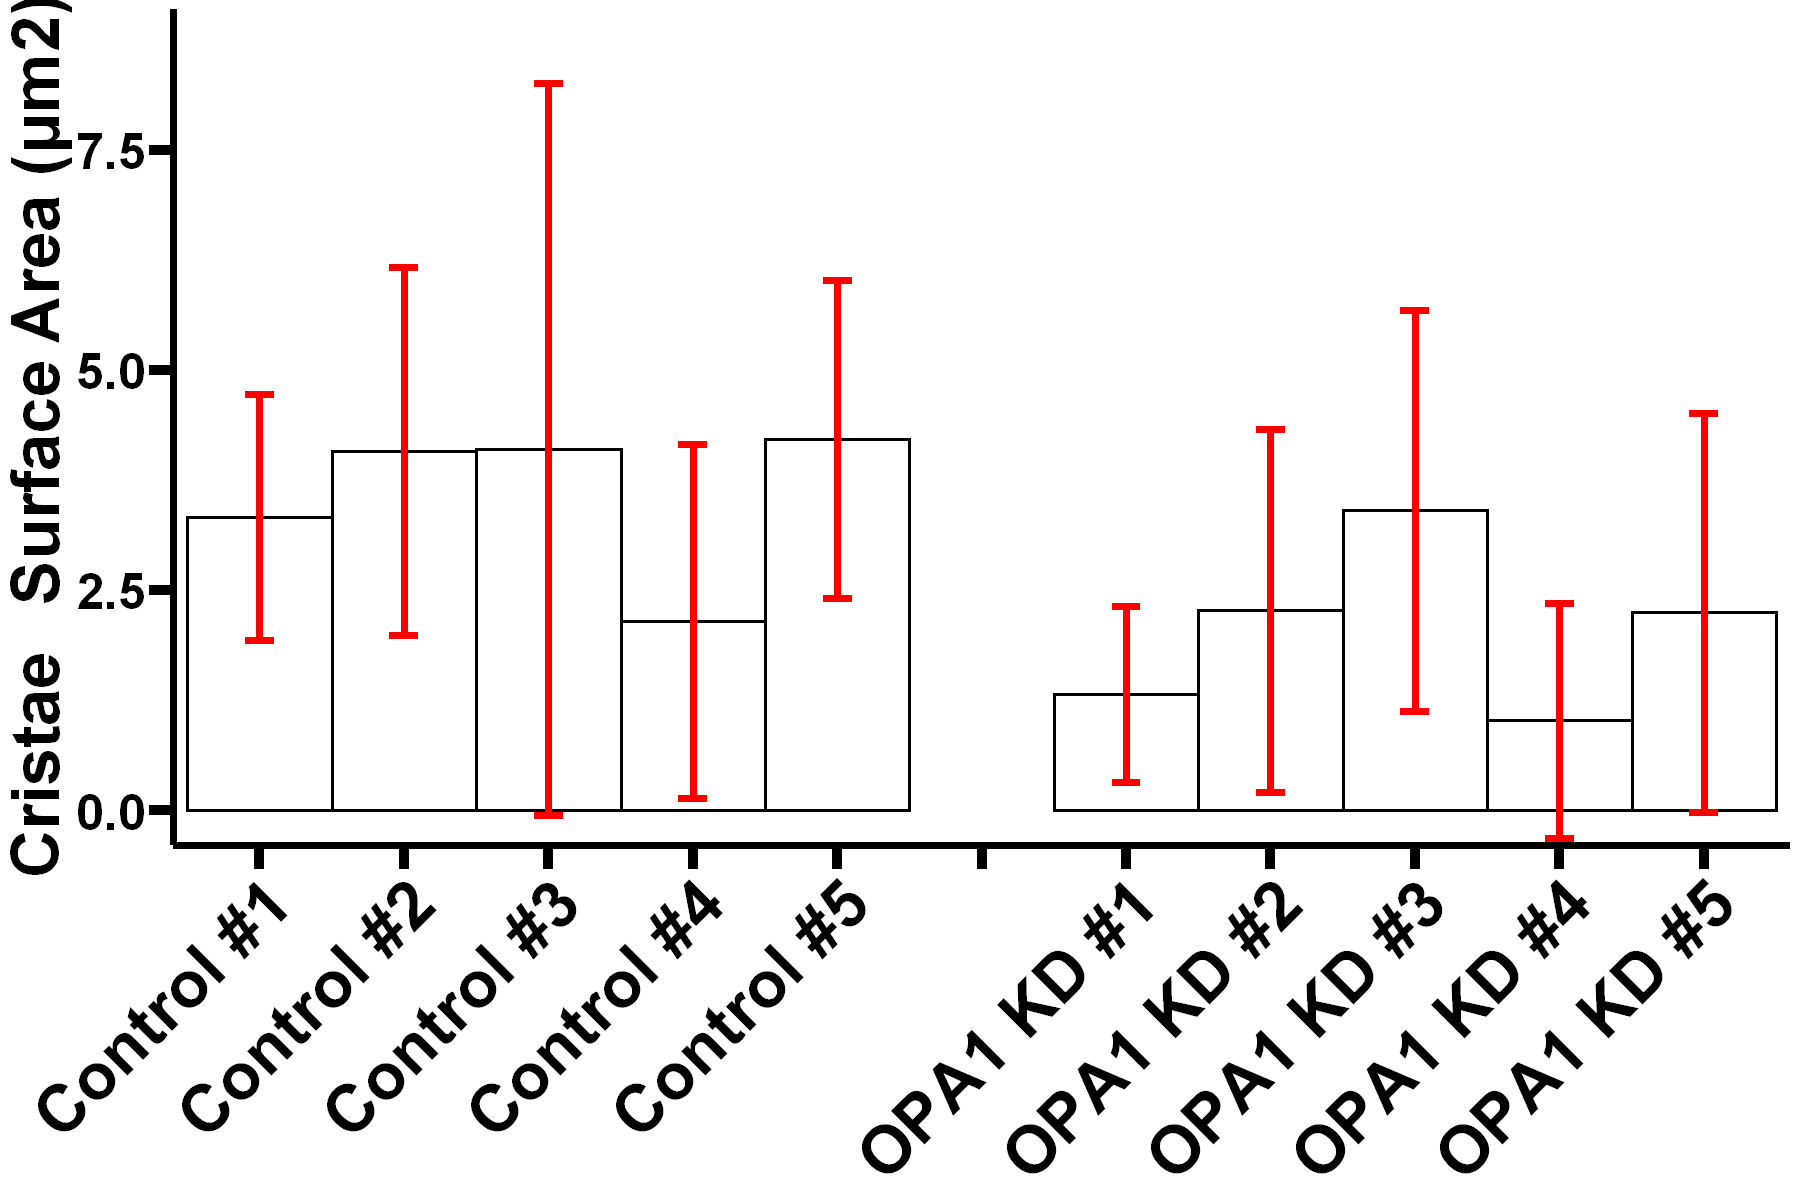

In [13]:
options(repr.plot.width=15, repr.plot.height=10)

graph <- ggplot(NULL)

graph <- graph + theme(
    axis.line = element_line(size = 2, colour="black"),
    axis.title.x = element_blank(),
    axis.title.y = element_text(size = 40, face = "bold", family = "Helvetica", color="black"),
    axis.text.x = element_text(size = 40, face = "bold", family = "Helvetica", color="black", angle = 45, hjust=1),
    axis.text.y = element_text(size = 30, face = "bold", family = "Helvetica", color="black"),
    axis.ticks = element_line(size = 3, color="black"),
    axis.ticks.length = unit(5, "mm"),
    panel.background = element_blank(), 
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
) + scale_y_continuous(
    expand = c(0,0), 
    limits=c(-0.4, 9.1)
)

graph <- graph + labs(
    y = "Cristae　Surface Area (µm2) "
) + geom_bar(
    stat="identity",
    data = cs_data,
    aes(x=Type, y=cristae_S_um),
    width=1,
    fill="white", 
    colour = "black",
    size = 1
) 

graph <- graph+ geom_errorbar(
    data = cs_data,
    size = 2,
    width = 0.2,
    color="red",
    aes(x = Type, ymin = cristae_S_um - sd, ymax = cristae_S_um + sd)
) + scale_x_discrete(
    labels = c("Control #1", "Control #2", "Control #3", "Control #4", "Control #5","",  "OPA1 KD #1", "OPA1 KD #2", "OPA1 KD #3", "OPA1 KD #4", "OPA1 KD #5"),
)


graph

In [14]:
ggsave(file = "Z:/paper_data/2021_cristae/for_revision_#2/figS7/002_cs.svg", plot = graph, dpi = 100, width = 15, height = 10)


Warning message:
"Removed 1 rows containing missing values (position_stack)."


# tubular V

In [15]:
tv_data <- data.frame(
    Gene = c("shCtrl", "shCtrl", "shCtrl", "shCtrl", "shCtrl", "shd", "shOPA1", "shOPA1", "shOPA1", "shOPA1", "shOPA1"),
    cell_No = c(1, 2, 3, 4, 5, "", 1, 2, 3, 4, 5),
    Type = c("shCtrl_1", "shCtrl_2", "shCtrl_3", "shCtrl_4", "shCtrl_5", "shD",  "shOPA1_1", "shOPA1_2", "shOPA1_3", "shOPA1_4", "shOPA1_5"),
    tubular_V_ratio = c(
        mean(all_data_[all_data_$Gene == "shCtrl", ][all_data_[all_data_$Gene == "shCtrl", ]$crop_No == 1, ]$`tubular_V/cristae_V`),
        mean(all_data_[all_data_$Gene == "shCtrl", ][all_data_[all_data_$Gene == "shCtrl", ]$crop_No == 2, ]$`tubular_V/cristae_V`),
        mean(all_data_[all_data_$Gene == "shCtrl", ][all_data_[all_data_$Gene == "shCtrl", ]$crop_No == 3, ]$`tubular_V/cristae_V`),
        mean(all_data_[all_data_$Gene == "shCtrl", ][all_data_[all_data_$Gene == "shCtrl", ]$crop_No == 4, ]$`tubular_V/cristae_V`),
        mean(all_data_[all_data_$Gene == "shCtrl", ][all_data_[all_data_$Gene == "shCtrl", ]$crop_No == 5, ]$`tubular_V/cristae_V`),
        NA,
        mean(all_data_[all_data_$Gene == "shOPA1", ][all_data_[all_data_$Gene == "shOPA1", ]$crop_No == 1, ]$`tubular_V/cristae_V`),
        mean(all_data_[all_data_$Gene == "shOPA1", ][all_data_[all_data_$Gene == "shOPA1", ]$crop_No == 2, ]$`tubular_V/cristae_V`),
        mean(all_data_[all_data_$Gene == "shOPA1", ][all_data_[all_data_$Gene == "shOPA1", ]$crop_No == 3, ]$`tubular_V/cristae_V`),
        mean(all_data_[all_data_$Gene == "shOPA1", ][all_data_[all_data_$Gene == "shOPA1", ]$crop_No == 4, ]$`tubular_V/cristae_V`),
        mean(all_data_[all_data_$Gene == "shOPA1", ][all_data_[all_data_$Gene == "shOPA1", ]$crop_No == 5, ]$`tubular_V/cristae_V`)
    ),
    sd = c(
        sd(all_data_[all_data_$Gene == "shCtrl", ][all_data_[all_data_$Gene == "shCtrl", ]$crop_No == 1, ]$`tubular_V/cristae_V`),
        sd(all_data_[all_data_$Gene == "shCtrl", ][all_data_[all_data_$Gene == "shCtrl", ]$crop_No == 2, ]$`tubular_V/cristae_V`),
        sd(all_data_[all_data_$Gene == "shCtrl", ][all_data_[all_data_$Gene == "shCtrl", ]$crop_No == 3, ]$`tubular_V/cristae_V`),
        sd(all_data_[all_data_$Gene == "shCtrl", ][all_data_[all_data_$Gene == "shCtrl", ]$crop_No == 4, ]$`tubular_V/cristae_V`),
        sd(all_data_[all_data_$Gene == "shCtrl", ][all_data_[all_data_$Gene == "shCtrl", ]$crop_No == 5, ]$`tubular_V/cristae_V`),
        NA,
        sd(all_data_[all_data_$Gene == "shOPA1", ][all_data_[all_data_$Gene == "shOPA1", ]$crop_No == 1, ]$`tubular_V/cristae_V`),
        sd(all_data_[all_data_$Gene == "shOPA1", ][all_data_[all_data_$Gene == "shOPA1", ]$crop_No == 2, ]$`tubular_V/cristae_V`),
        sd(all_data_[all_data_$Gene == "shOPA1", ][all_data_[all_data_$Gene == "shOPA1", ]$crop_No == 3, ]$`tubular_V/cristae_V`),
        sd(all_data_[all_data_$Gene == "shOPA1", ][all_data_[all_data_$Gene == "shOPA1", ]$crop_No == 4, ]$`tubular_V/cristae_V`),
        sd(all_data_[all_data_$Gene == "shOPA1", ][all_data_[all_data_$Gene == "shOPA1", ]$crop_No == 5, ]$`tubular_V/cristae_V`)
    )
)

Warning message:
"Removed 1 rows containing missing values (position_stack)."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call.graphics(C_text, as.graphicsAnno

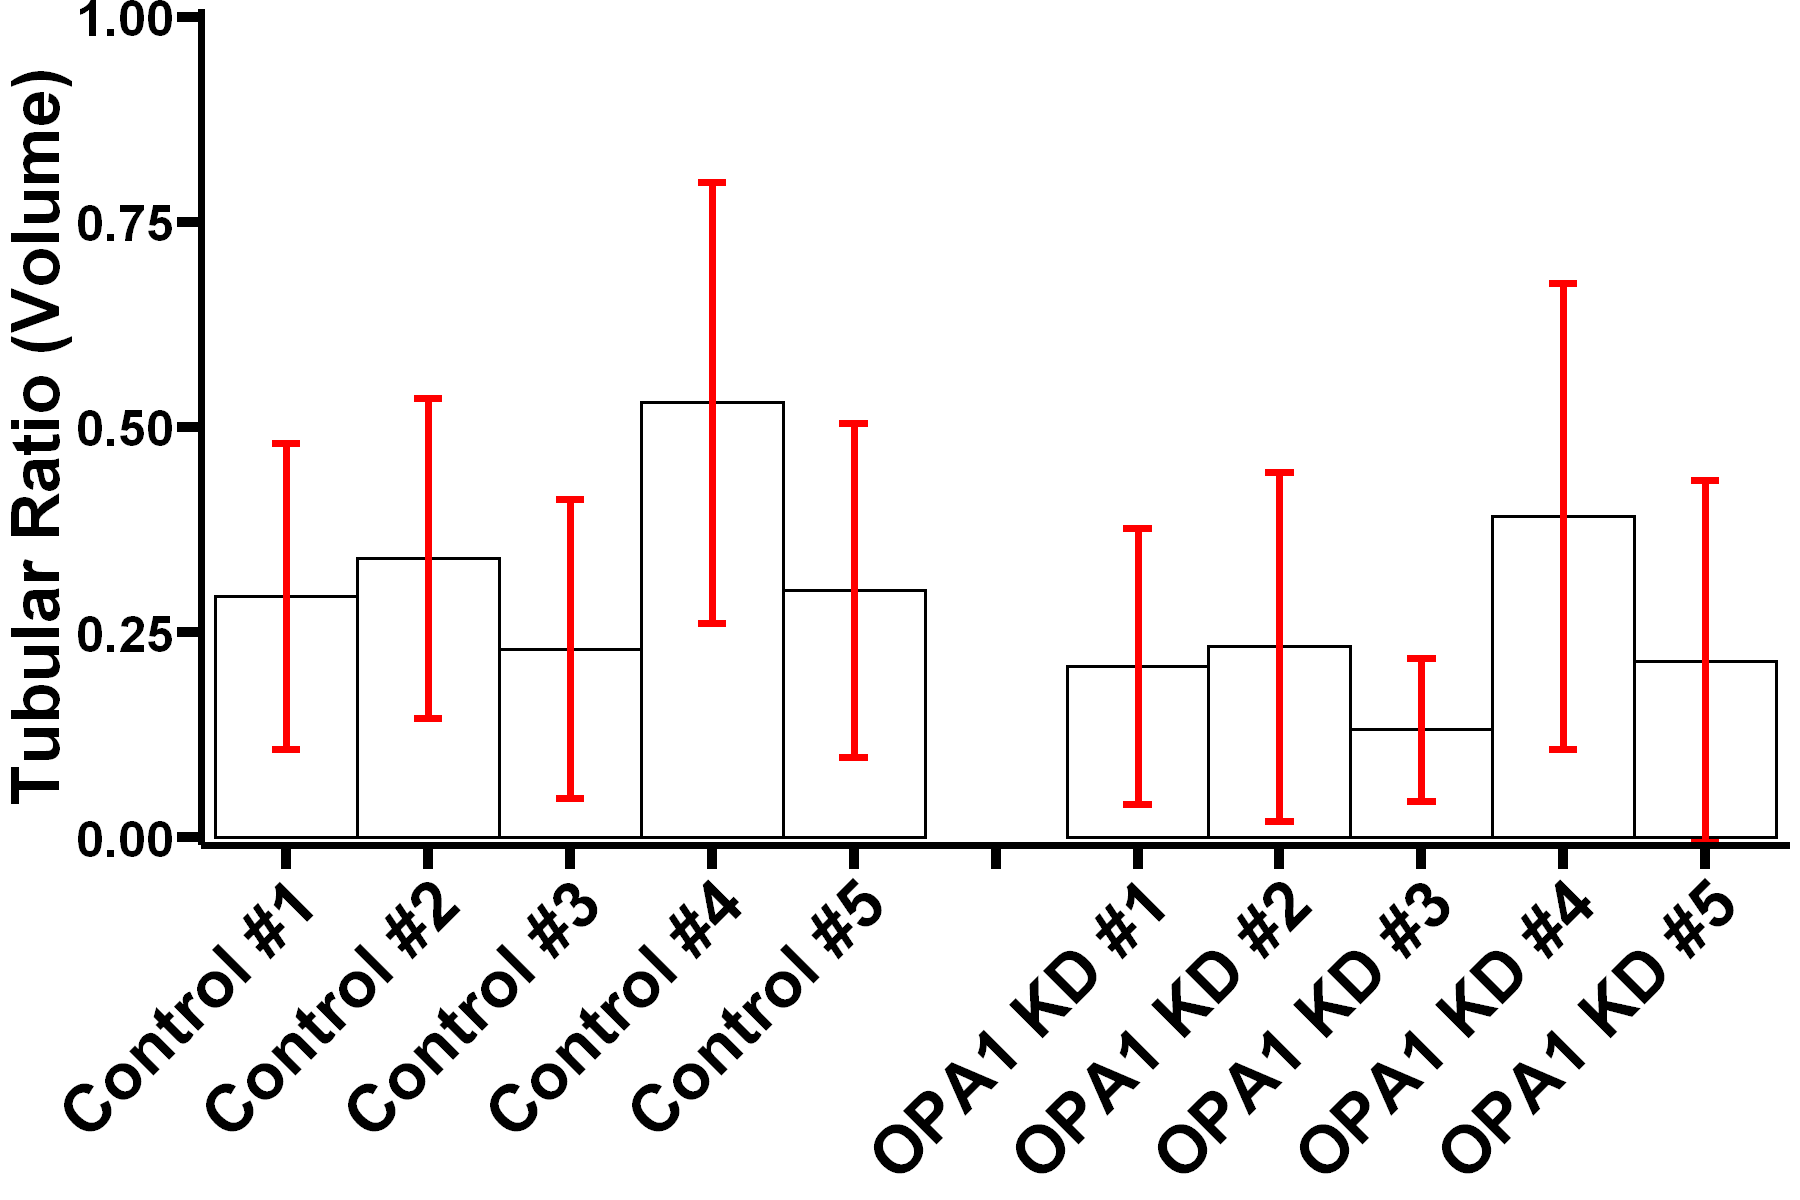

In [16]:
options(repr.plot.width=15, repr.plot.height=10)

graph <- ggplot(NULL)

graph <- graph + theme(
    axis.line = element_line(size = 2, colour="black"),
    axis.title.x = element_blank(),
    axis.title.y = element_text(size = 40, face = "bold", family = "Helvetica", color="black"),
    axis.text.x = element_text(size = 40, face = "bold", family = "Helvetica", color="black", angle = 45, hjust=1),
    axis.text.y = element_text(size = 30, face = "bold", family = "Helvetica", color="black"),
    axis.ticks = element_line(size = 3, color="black"),
    axis.ticks.length = unit(5, "mm"),
    panel.background = element_blank(), 
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
) + scale_y_continuous(
    expand = c(0,0), 
    limits=c(-0.01, 1.01)
)

graph <- graph + labs(
    y = "Tubular Ratio (Volume) "
) + geom_bar(
    stat="identity",
    data = tv_data,
    aes(x=Type, y=tubular_V_ratio),
    width=1,
    fill="white", 
    colour = "black",
    size = 1
) 

graph <- graph+ geom_errorbar(
    data = tv_data,
    size = 2,
    width = 0.2,
    color="red",
    aes(x = Type, ymin = tubular_V_ratio - sd, ymax = tubular_V_ratio + sd)
) + scale_x_discrete(
    labels = c("Control #1", "Control #2", "Control #3", "Control #4", "Control #5", "",  "OPA1 KD #1", "OPA1 KD #2", "OPA1 KD #3", "OPA1 KD #4", "OPA1 KD #5"),
)


graph

In [17]:
ggsave(file = "Z:/paper_data/2021_cristae/for_revision_#2/figS7/002_tv.svg", plot = graph, dpi = 100, width = 15, height = 10)


Warning message:
"Removed 1 rows containing missing values (position_stack)."


# tubular S

In [18]:
ts_data <- data.frame(
    Gene = c("shCtrl", "shCtrl", "shCtrl", "shCtrl", "shCtrl", "shD", "shOPA1", "shOPA1", "shOPA1", "shOPA1", "shOPA1"),
    cell_No = c(1, 2, 3, 4, 5, "", 1, 2, 3, 4, 5),
    Type = c("shCtrl_1", "shCtrl_2", "shCtrl_3", "shCtrl_4", "shCtrl_5", "shD", "shOPA1_1", "shOPA1_2", "shOPA1_3", "shOPA1_4", "shOPA1_5"),
    tubular_S_ratio = c(
        mean(all_data_[all_data_$Gene == "shCtrl", ][all_data_[all_data_$Gene == "shCtrl", ]$crop_No == 1, ]$`tubular_S/cristae_S`),
        mean(all_data_[all_data_$Gene == "shCtrl", ][all_data_[all_data_$Gene == "shCtrl", ]$crop_No == 2, ]$`tubular_S/cristae_S`),
        mean(all_data_[all_data_$Gene == "shCtrl", ][all_data_[all_data_$Gene == "shCtrl", ]$crop_No == 3, ]$`tubular_S/cristae_S`),
        mean(all_data_[all_data_$Gene == "shCtrl", ][all_data_[all_data_$Gene == "shCtrl", ]$crop_No == 4, ]$`tubular_S/cristae_S`),
        mean(all_data_[all_data_$Gene == "shCtrl", ][all_data_[all_data_$Gene == "shCtrl", ]$crop_No == 5, ]$`tubular_S/cristae_S`),
        NA,
        mean(all_data_[all_data_$Gene == "shOPA1", ][all_data_[all_data_$Gene == "shOPA1", ]$crop_No == 1, ]$`tubular_S/cristae_S`),
        mean(all_data_[all_data_$Gene == "shOPA1", ][all_data_[all_data_$Gene == "shOPA1", ]$crop_No == 2, ]$`tubular_S/cristae_S`),
        mean(all_data_[all_data_$Gene == "shOPA1", ][all_data_[all_data_$Gene == "shOPA1", ]$crop_No == 3, ]$`tubular_S/cristae_S`),
        mean(all_data_[all_data_$Gene == "shOPA1", ][all_data_[all_data_$Gene == "shOPA1", ]$crop_No == 4, ]$`tubular_S/cristae_S`),
        mean(all_data_[all_data_$Gene == "shOPA1", ][all_data_[all_data_$Gene == "shOPA1", ]$crop_No == 5, ]$`tubular_S/cristae_S`)
    ),
    sd = c(
        sd(all_data_[all_data_$Gene == "shCtrl", ][all_data_[all_data_$Gene == "shCtrl", ]$crop_No == 1, ]$`tubular_S/cristae_S`),
        sd(all_data_[all_data_$Gene == "shCtrl", ][all_data_[all_data_$Gene == "shCtrl", ]$crop_No == 2, ]$`tubular_S/cristae_S`),
        sd(all_data_[all_data_$Gene == "shCtrl", ][all_data_[all_data_$Gene == "shCtrl", ]$crop_No == 3, ]$`tubular_S/cristae_S`),
        sd(all_data_[all_data_$Gene == "shCtrl", ][all_data_[all_data_$Gene == "shCtrl", ]$crop_No == 4, ]$`tubular_S/cristae_S`),
        sd(all_data_[all_data_$Gene == "shCtrl", ][all_data_[all_data_$Gene == "shCtrl", ]$crop_No == 5, ]$`tubular_S/cristae_S`),
        NA,
        sd(all_data_[all_data_$Gene == "shOPA1", ][all_data_[all_data_$Gene == "shOPA1", ]$crop_No == 1, ]$`tubular_S/cristae_S`),
        sd(all_data_[all_data_$Gene == "shOPA1", ][all_data_[all_data_$Gene == "shOPA1", ]$crop_No == 2, ]$`tubular_S/cristae_S`),
        sd(all_data_[all_data_$Gene == "shOPA1", ][all_data_[all_data_$Gene == "shOPA1", ]$crop_No == 3, ]$`tubular_S/cristae_S`),
        sd(all_data_[all_data_$Gene == "shOPA1", ][all_data_[all_data_$Gene == "shOPA1", ]$crop_No == 4, ]$`tubular_S/cristae_S`),
        sd(all_data_[all_data_$Gene == "shOPA1", ][all_data_[all_data_$Gene == "shOPA1", ]$crop_No == 5, ]$`tubular_S/cristae_S`)
    )
)

Warning message:
"Removed 1 rows containing missing values (position_stack)."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call.graphics(C_text, as.graphicsAnno

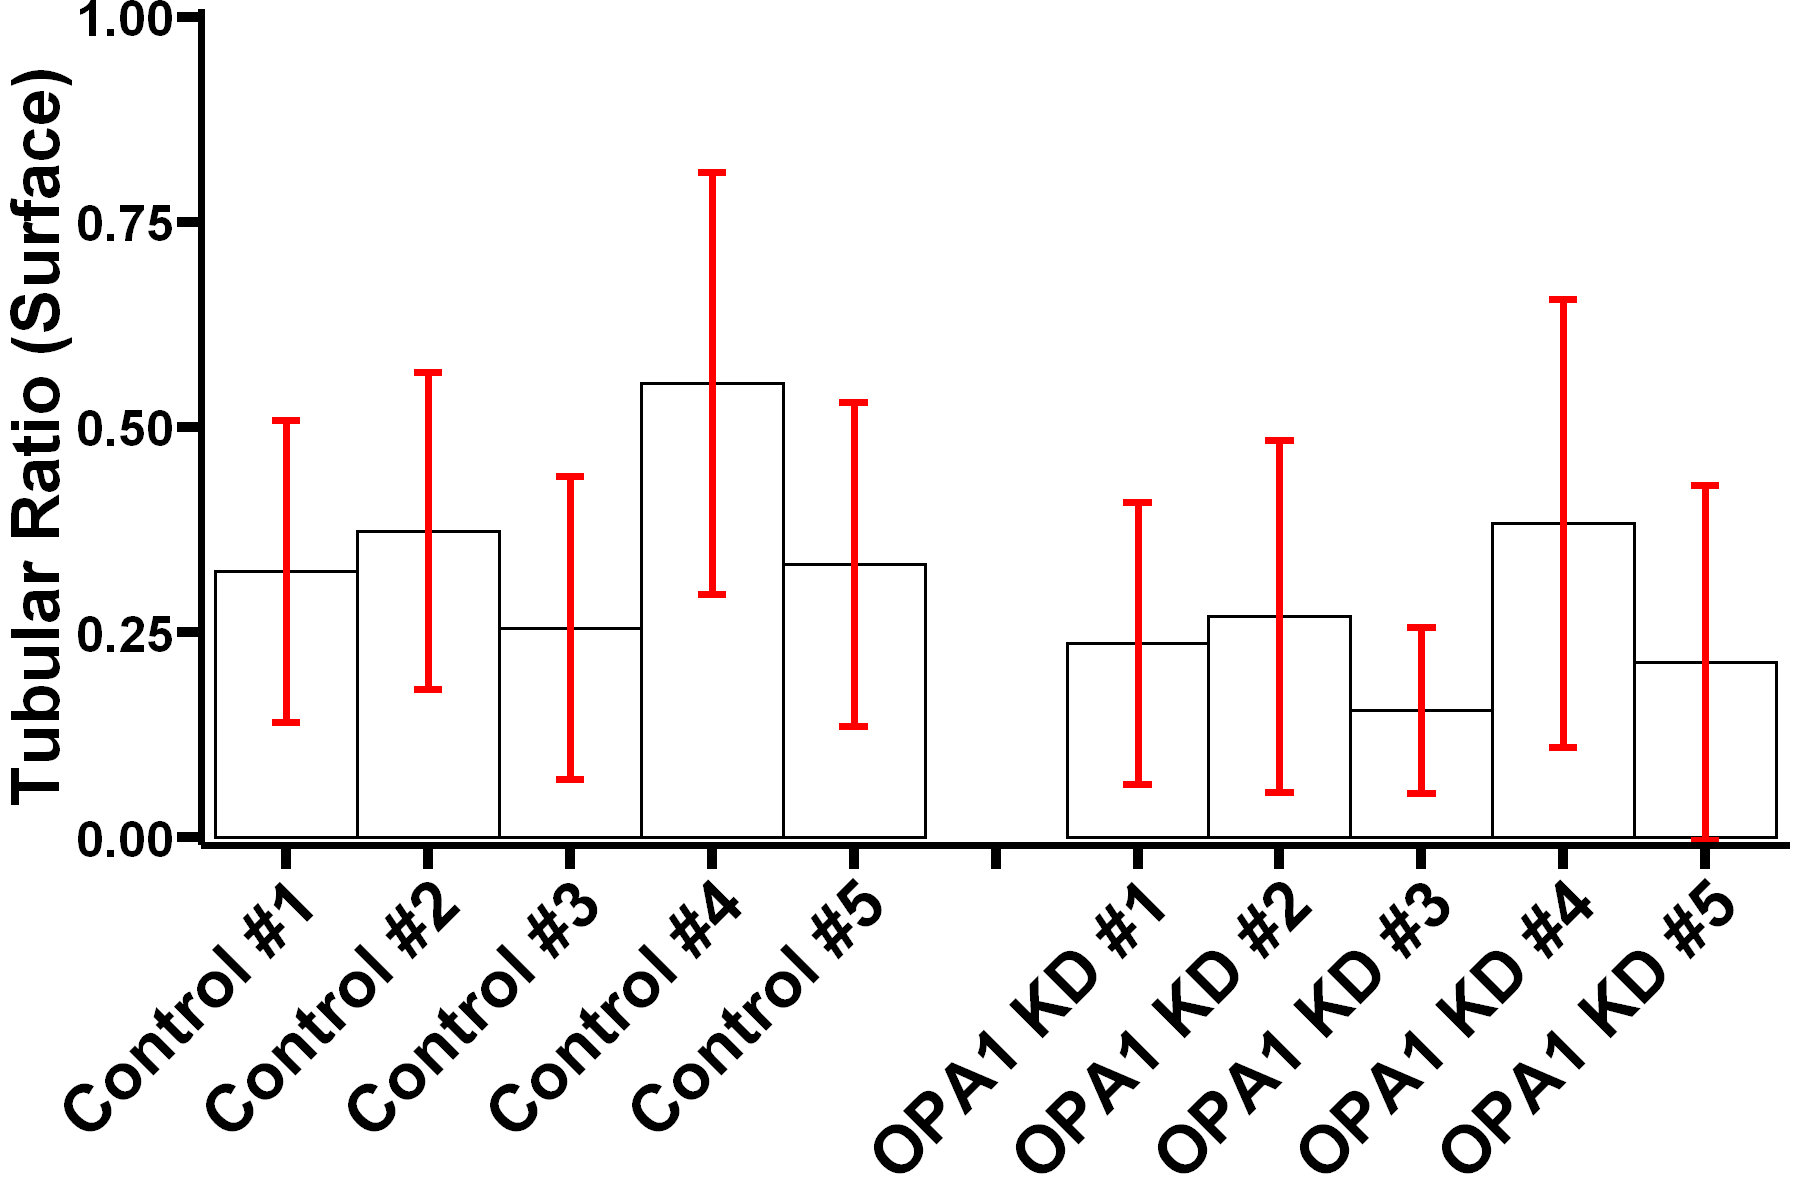

In [19]:
options(repr.plot.width=15, repr.plot.height=10)

graph <- ggplot(NULL)

graph <- graph + theme(
    axis.line = element_line(size = 2, colour="black"),
    axis.title.x = element_blank(),
    axis.title.y = element_text(size = 40, face = "bold", family = "Helvetica", color="black"),
    axis.text.x = element_text(size = 40, face = "bold", family = "Helvetica", color="black", angle = 45, hjust=1),
    axis.text.y = element_text(size = 30, face = "bold", family = "Helvetica", color="black"),
    axis.ticks = element_line(size = 3, color="black"),
    axis.ticks.length = unit(5, "mm"),
    panel.background = element_blank(), 
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
) + scale_y_continuous(
    expand = c(0,0), 
    limits=c(-0.01, 1.01)
)

graph <- graph + labs(
    y = "Tubular Ratio (Surface) "
) + geom_bar(
    stat="identity",
    data = ts_data,
    aes(x=Type, y=tubular_S_ratio),
    width=1,
    fill="white", 
    colour = "black",
    size = 1
) 

graph <- graph+ geom_errorbar(
    data = ts_data,
    size = 2,
    width = 0.2,
    color="red",
    aes(x = Type, ymin = tubular_S_ratio - sd, ymax = tubular_S_ratio + sd)
) + scale_x_discrete(
    labels = c("Control #1", "Control #2", "Control #3", "Control #4", "Control #5","", "OPA1 KD #1", "OPA1 KD #2", "OPA1 KD #3", "OPA1 KD #4", "OPA1 KD #5"),
)


graph

In [20]:
ggsave(file = "Z:/paper_data/2021_cristae/for_revision_#2/figS7/002_ts.svg", plot = graph, dpi = 100, width = 15, height = 10)


Warning message:
"Removed 1 rows containing missing values (position_stack)."
